In [1]:
import sys
sys.path.append("..")  # Adds the parent directory to the sys.path

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import scienceplots
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
from background_subtraction_gmm import Backsub as Backsub

np.random.seed(137)

# Example Plots

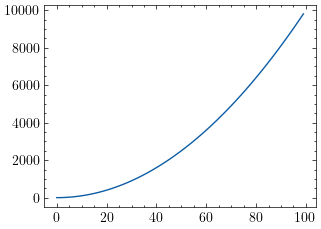

In [2]:
plt.style.use('science')
x=np.arange(100)
y=x**2
with plt.style.context('science'):
    plt.figure()
    plt.plot(x, y)
    plt.show()

# Train Background on GMM

In [3]:
backsub=Backsub("../Video_Data/take_02.avi", history=100)
backsub.begin_train(max_frames=250)


# Load Example Image

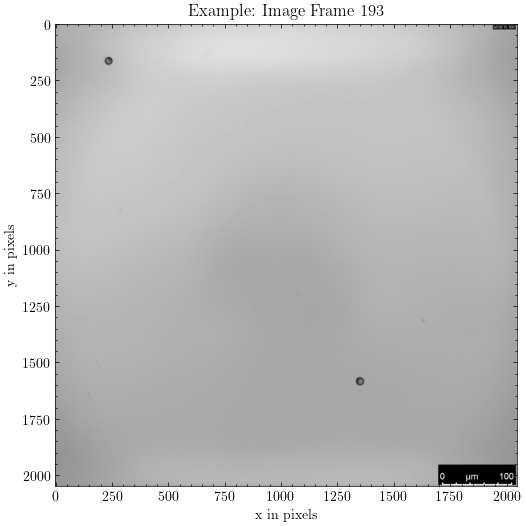

In [4]:
im=cv.imread("/Users/Hoang_1/Desktop/Master_Arbeit/software/janus_particle_tracking/Image_Data/Aufnahmen_JPEG_06_07_take_2/Hoang_07_06_2023_Aufnahmen_Rollen_Partikel_Rollen_12_mu_200_002_t193.jpg", cv.IMREAD_GRAYSCALE)
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [6, 6]
    ax=plt.figure()
    plt.title("Example: Image Frame 193")
    plt.xlabel("x in pixels")
    plt.ylabel("y in pixels")
    plt.imshow(im, cmap="gray")
    plt.show()

# Show Background Image

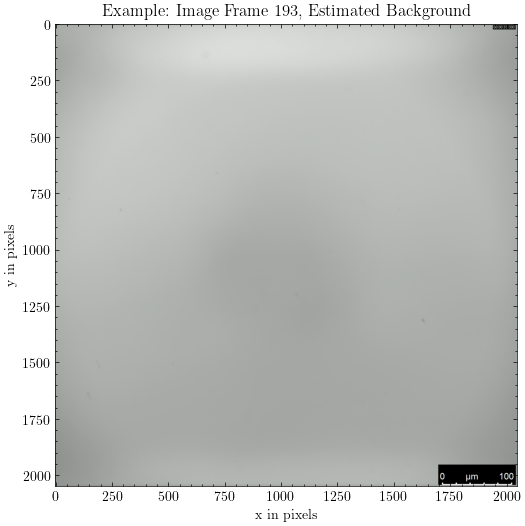

In [5]:
background=backsub.getBackgroundImage()
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [6, 6]
    ax=plt.figure()
    plt.title("Example: Image Frame 193, Estimated Background")
    plt.xlabel("x in pixels")
    plt.ylabel("y in pixels")
    plt.imshow(background, cmap="gray")
    plt.show()


# Show Foreground Image

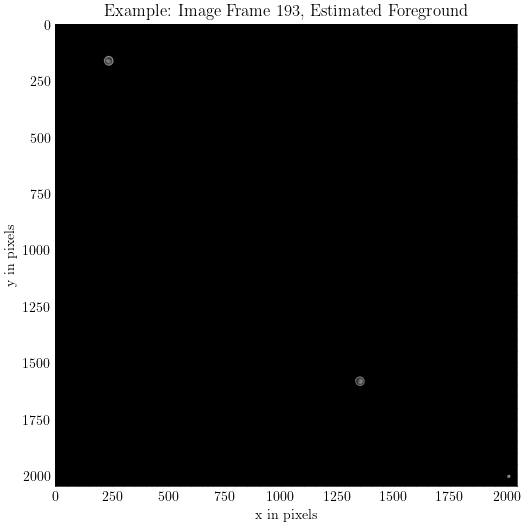

In [6]:
im=cv.cvtColor(im,cv.COLOR_GRAY2BGR)
mask=backsub.getMask(im)
foreground=np.copy(im)
foreground[mask==0]=0
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [6, 6]
    ax=plt.figure()
    plt.title("Example: Image Frame 193, Estimated Foreground")
    plt.xlabel("x in pixels")
    plt.ylabel("y in pixels")
    plt.imshow(foreground, cmap="gray")
    plt.show()